# Hypothesis Testing in Healthcare: Drug Safety

A pharmaceutical company GlobalXYZ has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome, they (GlobalXYZ) have presented the dataset to your organization, a non-profit that focuses primarily on drug safety.

The dataset provided contained five adverse effects, demographic data, vital signs, etc. Your organization is primarily interested in the drug's adverse reactions. It wants to know if the adverse reactions, if any, are of significant proportions. It has asked you to explore and answer some questions from the data.

The dataset `drug_safety.csv` was obtained from [Hbiostat](https://hbiostat.org/data/) courtesy of the Vanderbilt University Department of Biostatistics. It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects `adverse_effects` and the number of adverse effects in a single individual `num_effects`.

The columns in the modified dataset are: 

| Column | Description |
|--------|-------------|
|`sex` | The gender of the individual |
|`age` | The age of the individual |
|`week` | The week of the drug testing |
|`trx` | The treatment (Drug) and control (Placebo) groups | 
|`wbc` | The count of white blood cells |
|`rbc` | The count of red blood cells |
|`adverse_effects` | The presence of at least a single adverse effect |
|`num_effects` | The number of adverse effects experienced by a single individual |

The original dataset can be found [here](https://hbiostat.org/data/repo/safety.rda).

Your organization has asked you to explore and answer some questions from the data collected. See the project instructions.

In [106]:
# Import packages
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")

# Start coding here...
drug_safety.head()

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,No,0
1,62,male,Drug,1,NaN,NaN,No,0
2,62,male,Drug,12,5.6,5.0,No,0
3,62,male,Drug,16,NaN,NaN,No,0
4,62,male,Drug,2,6.6,5.1,No,0


In [107]:
por = drug_safety.groupby('trx')['adverse_effects'].value_counts(normalize= True)
por

trx      adverse_effects
Drug     No                 0.904540
         Yes                0.095460
Placebo  No                 0.904762
         Yes                0.095238
Name: adverse_effects, dtype: float64

In [108]:
nobs = drug_safety.groupby('trx')['adverse_effects'].value_counts()
nobs

trx      adverse_effects
Drug     No                 9703
         Yes                1024
Placebo  No                 4864
         Yes                 512
Name: adverse_effects, dtype: int64

In [109]:
n = drug_safety.groupby('trx')['adverse_effects'].count()

n

trx
Drug       10727
Placebo     5376
Name: adverse_effects, dtype: int64

In [110]:
n_yes = np.array([nobs[('Drug', 'Yes')],nobs[('Placebo', 'Yes')]])
n_yes

array([1024,  512])

In [111]:
n_per = np.array([n['Drug'],n['Placebo']])
n_per

array([10727,  5376])

In [112]:
stat, two_sample_p_value = proportions_ztest(count= n_yes, nobs= n_per, alternative="two-sided") 
two_sample_p_value

0.9639333330262475

In [113]:
drug_safety.groupby('trx')['num_effects'].value_counts()

trx      num_effects
Drug     0              9703
         1               956
         2                63
         3                 5
Placebo  0              4864
         1               486
         2                25
         3                 1
Name: num_effects, dtype: int64

In [114]:
expected, observed, stats = pingouin.chi2_independence(data=drug_safety, x='num_effects', y='trx', correction=False)

num_effects_p_value = stats[stats['test'] == 'pearson']['pval'][0]
num_effects_p_value

0.6150123339426765

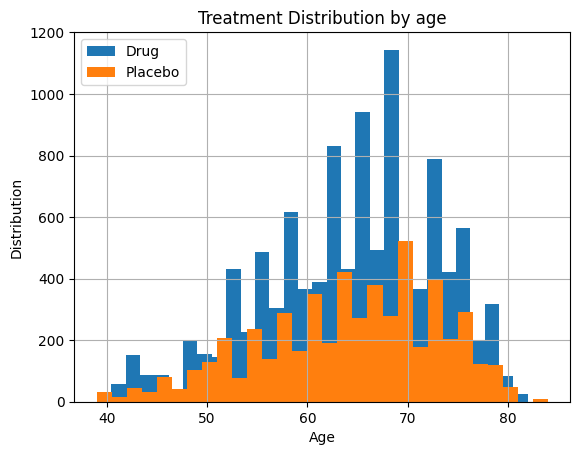

In [115]:
dist = drug_safety.groupby('trx')['age']
dist.hist(bins = 30)
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title('Treatment Distribution by age')
plt.legend(['Drug', 'Placebo'], loc='upper left')
plt.show();

In [116]:
by_age = drug_safety.pivot(columns= 'trx', values= 'age')

In [117]:
age_group_effects_p_value = pingouin.mwu(x= by_age['Drug'], y= by_age['Placebo'], alternative='two-sided')['p-val']
age_group_effects_p_value

MWU    0.256963
Name: p-val, dtype: float64